In [11]:
%Importing icecover data to understand biodiversity dynamics --- data from http://nsidc.org/data/masie
A = dlmread("masie_4km_allyears_extent_sqkm.csv",",");

In [12]:
A(1:10,3)

ans =

   0.0000e+00
   0.0000e+00
   1.0697e+06
   1.0697e+06
   1.0697e+06
   1.0697e+06
   1.0697e+06
   1.0697e+06
   1.0697e+06
   1.0697e+06



In [13]:
size(A)


ans =

   4377     18



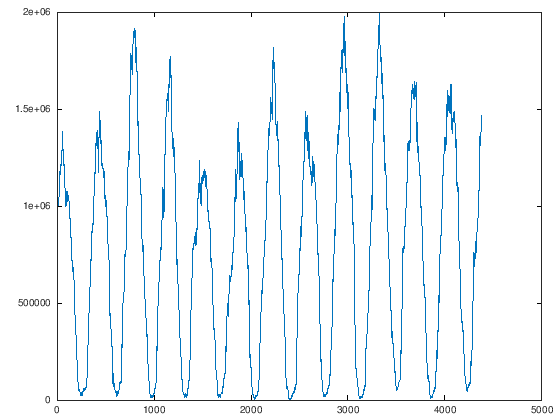

In [14]:
plot(A(:,10))


mu =    2.2711e-11


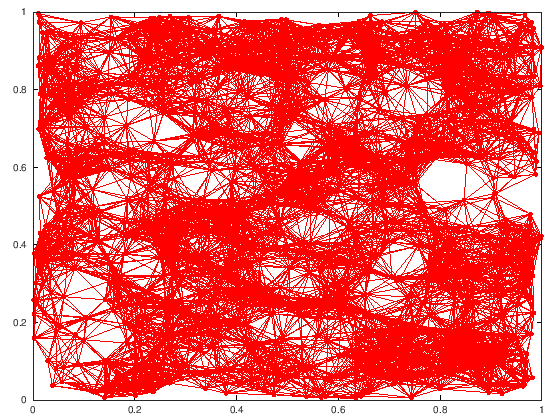

In [15]:
%We will use the fluct in ice cover as a proxy of habitat and connectivity dynamics
%RGG %Quick code Carlos J Melian
%November 2013
J = 1000;r = 0.1;%r = unifrnd(0.01,1);
D = zeros(J,J);

%Asymptotic behavior
mu = J*(e^(-pi * r^2 * J))
MA = log(J) - log(mu);
MB = pi*J;
rc = sqrt(MA/MB);


n = unifrnd(0,1,J,2);
for i = 1:J-1;
     for j = i+1:J;
         A = (n(i,1) - n(j,1))^2;%Euclidean distance
         B = (n(i,2) - n(j,2))^2;
         d(i,j) = sqrt(A + B);
         if d(i,j) < r;
            D(i,j) = 1;
         else
            D(i,j) = 0;
         end
     end
end
D1=D+D';

%plot network
gplot(D1,n, "r.-")
set (get (gca, ("children")), "markersize", 12);


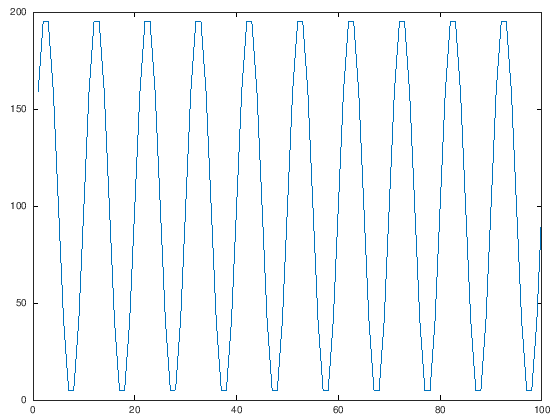

In [10]:
show=true;
  showEach = 1;
  for ri = 1:1,    
    S = 10;J = 100;%S sites and J inds. per site
    
    %1. Implement a general case with zero-sum dynamics 
    %combining static-dynamic vs. symmetric-asymmetric scenarios (non-stationary Gillespie later)
    %Be sure that the mij + lambda + nu == 1
    %----------------------------------------------------------- 
    n = unifrnd(0,1000,S,2); %sites!
    R = ones(S,J);
    countgen = 0;
    Pairs = zeros(1,2);cevents = 0;
    newSp = 1;
    gamma=[];
    for k = 1:100,  %Generations...        
        A = 200;%amplitude, is the peak deviation: 
        %350 to match simulations in random landscapes
        f = 0.1;%ordinary frequency, number of 
        %cycles that occur each second of time
        sig = 0;%the phase
        countgen = countgen + 1;
        %r = A*sin(2*pi*f*countgen + sig) + A;%starting point with r approx.
        r(k,1) = A/2*(sin(2*pi*f*countgen + sig)+1);
    end
    v=1:100;
    plot(v,r)
    end

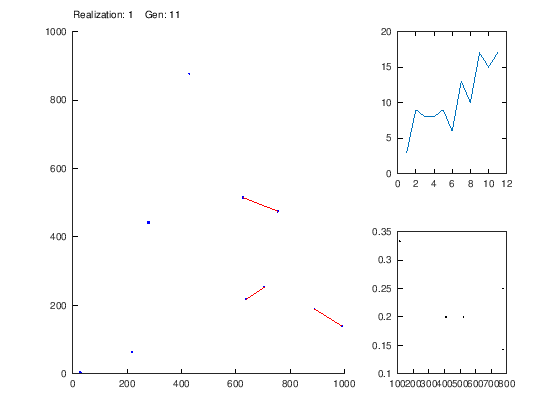

In [16]:
%----------------------------------------------------------------------
%General dynamic landscapes
%Melian@KB May 2017
%Palamara&Melian June 2017 version from scratch
%Alex Rozenfeld June 2017
%----------------------------------------------------------------------
  show=true;
  showEach = 1;
  for ri = 1:50,    
    S = 10;J = 100;%S sites and J inds. per site
    
    %1. Implement a general case with zero-sum dynamics 
    %combining static-dynamic vs. symmetric-asymmetric scenarios (non-stationary Gillespie later)
    %Be sure that the mij + lambda + nu == 1
    %----------------------------------------------------------- 
    n = unifrnd(0,1000,S,2); %sites!
    R = ones(S,J);
    countgen = 0;
    Pairs = zeros(1,2);cevents = 0;
    newSp = 1;
    gamma=[];
    for k = 1:100,  %Generations...        
        A = 200;%amplitude, is the peak deviation: 
        %350 to match simulations in random landscapes
        f = 0.1;%ordinary frequency, number of 
        %cycles that occur each second of time
        sig = 0;%the phase
        countgen = countgen + 1;
        %r = A*sin(2*pi*f*countgen + sig) + A;%starting point with r approx.
        r = A/2*(sin(2*pi*f*countgen + sig)+1);
        
        %2. Check sinusoidal with boundary conditions considering continuous A and f
        %Check r_min == 0 and r_max == max distance ij
               
        D = zeros(S,S);%theshold matrix
        Di = zeros(S,S);%distance matrix
        mu = S*(exp((-pi * (r/1000)^2 * S)));%site connectivity
        

        for i = 1:S-1,
            for j = i+1:S,
                A = (n(i,1) - n(j,1))^2;%Euclidean distance
                B = (n(i,2) - n(j,2))^2;
                d(i,j) = sqrt(A + B);
                Di(i,j) = 1/d(i,j);   
                
                %3. This is the simplest kernel
                %Explore the asymmetry under 1/d(i,j)
                %Do we need to implement more asymmetric situations, like 1/(d(i,j)^x) with x > 1;
                
                if d(i,j) < r;%threshold
                   D(i,j) = 1;
                else
                   D(i,j) = 0;
                end
           end
        end
        %DI=Di+Di';Dc=cumsum(DI,2);D1=D+D';
        DI=Di+Di';
        D1=D+D';
        DI=DI.*D1;  %<========ALEX
        Dc=cumsum(DI,2);
        
        m = unifrnd(0.001,0.1,1);  %migraion from the blocks
        v = unifrnd(0.0001,0.01,1);%regional migration?
        l=1-(m+v);
        
        for j = 1:J*S,  %MonteCarlo Time
            KillHab = unidrnd(S);
            KillInd = unidrnd(J);
            ep=unifrnd(0,1,1);  %event probability
            if ep < m,  %Migration
              MigrantHabProb = unifrnd(0,max(Dc(KillHab,:)));
              MigrantHab = find(Dc(KillHab,:) >= MigrantHabProb);
            %pause
              if D1(KillHab,MigrantHab) == 1; 
               %4. Implement local birth dynamics and speciation dynamics
               
               MigrantInd = unidrnd(J);  
               cevents = cevents + 1;
               Pairs(cevents,1) = KillHab;
               Pairs(cevents,2) = MigrantHab(1,1); 
               
               R(KillHab,KillInd)=R(MigrantHab(1,1),MigrantInd);            
              end
            elseif ep <= m+v,  %mutation
               newSp = newSp +1;
               R(KillHab,KillInd) = newSp;
            else               %birth
               BirthLocalInd = unidrnd(J);
               while BirthLocalInd == KillInd,
                 BirthLocalInd = unidrnd(J);
               end
               R(KillHab,KillInd) = R(KillHab,BirthLocalInd);
            end
        end
        %Species at each site:
        
        Sp_eachSt=arrayfun(@(ix) unique(R(ix,:)), [1:size(R,1)],'uniformoutput',false);
        %alpha(g) Num of species at each site for present generation
        alpha = arrayfun(@(v) length(cell2mat(v)),Sp_eachSt);
        gamma(countgen) = numel(unique(R));
        
        
        Sim=CalcSim(Sp_eachSt,S);
        
        
        
        if show && (k==1 || mod(k,showEach)==0), %Show results          
          ShowResults(ri,countgen,S,n,D1,d,alpha,gamma,Sim)

        end
    end
  end           

end

function Sim = CalcSim(Sp_eachSt,S)
  Sim = zeros(S,S);
  for i = 1:S-1,
     for j = i+1:S,
        %CantSpEnComun_ij = #(Sp_i n Sp_j)
        %Similaridad_ij= CantSpEnComun_ij / (#Sp_i + #Sp_j - CantSpEnComun_ij)
        CantSpEnComun_ij = length(intersect(Sp_eachSt{i},Sp_eachSt{j}));
        Sim(i,j)= CantSpEnComun_ij / (length(Sp_eachSt{i})+length(Sp_eachSt{j})-CantSpEnComun_ij);        
     end
  end
  Sim = Sim + Sim' + eye(S,S);
end

function ShowResults(ri,countgen,S,n,D1,d,alpha,gamma,Sim)
          sizeFactor=10;
          figure(ri)
          subplot(2,3,[1 2 4 5]) %alpha  

          hold off
          for i=1:S,
            scatter(n(i,1),n(i,2),sizeFactor*alpha(i),'b','filled') %Sites
            hold on;
            hola=1;
            ixStConnected=find(D1(i,:));
            for ix=ixStConnected,
              line([n(i,1) n(ix,1)]',[n(i,2) n(ix,2)]','color','r') %Links
            end
          end
          xlim([0 1000])
          ylim([0 1000])
          text(1,1050,['Realization: ' num2str(ri) '    Gen: ' num2str(countgen)])


          subplot(2,3,3)  %gamma
          plot(gamma);
          %hold on
          %scatter(countgen,gamma(countgen),5,'k')

          subplot(2,3,6) %Sim VS d (connected and non connected)
          hold off
          for i = 1:S-1,
             for j = i+1:S,
                scatter(d(i,j),Sim(i,j),5,'k')
                hold on              
             end
          end        
          pause(0.001);